In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. SETUP PATH FILE
file_path = r'C:\Users\farhan\OneDrive\Documents\UAS ML FARHAN\data_gizi.csv.xlsx'

In [27]:
# 2. LOAD DATA
try:
    df = pd.read_excel(file_path, skiprows=2)
    print("File berhasil dimuat!")
except Exception as e:
    print(f"Gagal memuat file: {e}")
    print("Mencoba menggunakan format CSV...")
    df = pd.read_csv(file_path, skiprows=2)

File berhasil dimuat!


In [28]:
# 3. PREPROCESSING
df.columns = df.columns.str.strip()

In [16]:
# Memastikan data 'Sangat Kurang' dan 'Kurang' adalah angka
df['Sangat Kurang'] = pd.to_numeric(df['Sangat Kurang'], errors='coerce')
df['Kurang'] = pd.to_numeric(df['Kurang'], errors='coerce')

In [ ]:
# Menghapus data kosong pada kolom 'Sangat Kurang' dan 'Kurang'
df = df.dropna(subset=['Sangat Kurang', 'Kurang'])

In [29]:
# Standarisasi Data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Sangat Kurang', 'Kurang']])

In [19]:
# 4. METODE ELBOW (Mencari K yang pas)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\farhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\farhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


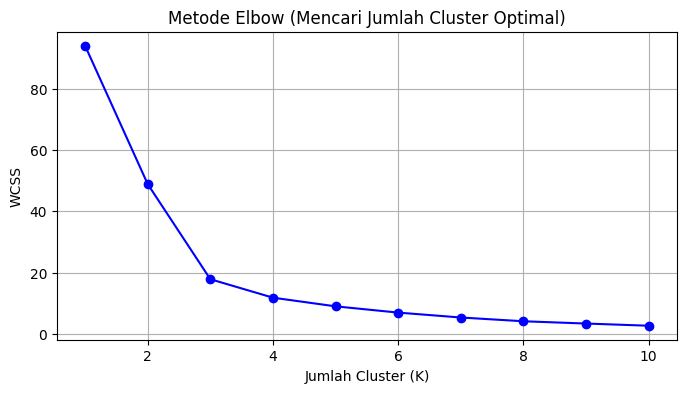

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Metode Elbow (Mencari Jumlah Cluster Optimal)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [21]:
# 5. MENJALANKAN K-MEANS (K=3)
# Berdasarkan data gizi, kita bagi 3: Rendah, Sedang, Tinggi
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='Sangat Kurang', ylabel='Kurang'>

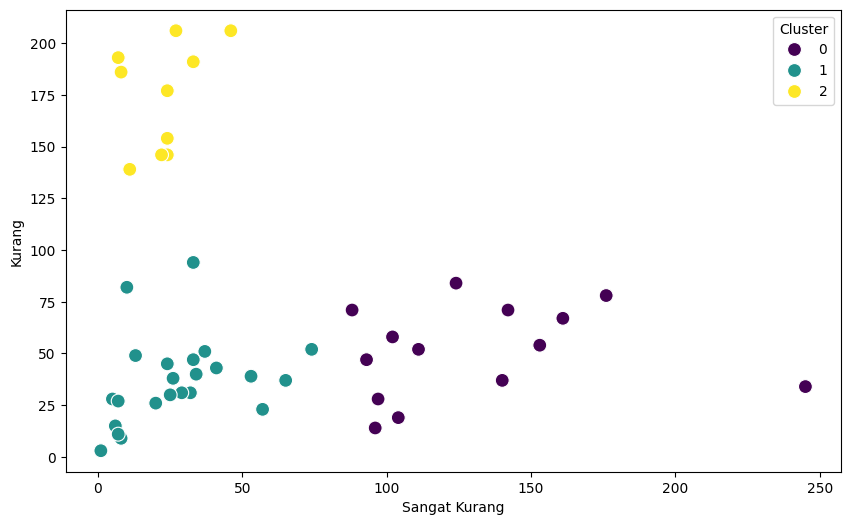

In [22]:
# 6. VISUALISASI HASIL CLUSTERING
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sangat Kurang', y='Kurang', hue='Cluster', palette='viridis', s=100)

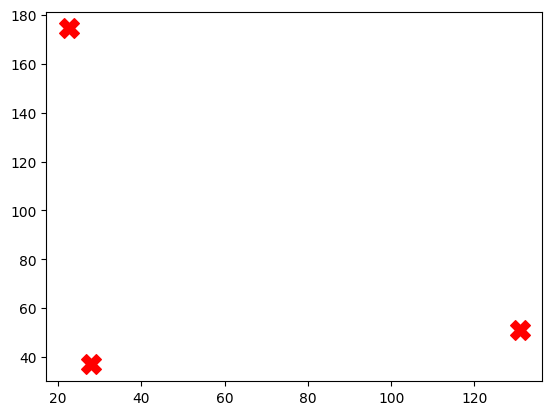

In [23]:
# Menampilkan Titik Pusat (Centroids)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

C:\Users\farhan\AppData\Local\Temp\ipykernel_33828\317840988.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


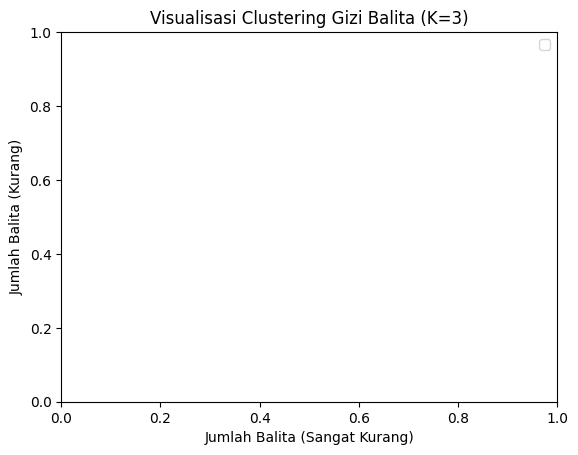

In [24]:
plt.title('Visualisasi Clustering Gizi Balita (K=3)')
plt.xlabel('Jumlah Balita (Sangat Kurang)')
plt.ylabel('Jumlah Balita (Kurang)')
plt.legend()
plt.show()

In [25]:
# 7. ANALISIS HASIL
print("\n--- Rata-rata per Cluster ---")
print(df.groupby('Cluster')[['Sangat Kurang', 'Kurang']].mean())


--- Rata-rata per Cluster ---
         Sangat Kurang  Kurang
Cluster                       
0           130.857143    51.0
1            27.826087    37.0
2            22.600000   174.4


In [26]:
# Simpan hasil ke file baru
output_path = r'C:\Users\farhan\OneDrive\Documents\UAS ML FARHAN\Hasil_Clustering.csv'
df.to_csv(output_path, index=False)
print(f"\nHasil analisis telah disimpan di: {output_path}")


Hasil analisis telah disimpan di: C:\Users\farhan\OneDrive\Documents\UAS ML FARHAN\Hasil_Clustering.csv
